# Prior Distributions for FLI

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm

## Global Parameters


$\log \tau^{G} \sim \mathcal{N}(\ln(0.2), 0.7)$ -> 95% CI is approximately [0.05, 0.8]

$\log \sigma_{\tau^{G}} \sim \mathcal{N}(-1, 0.1)$ (variance of the local parameters)

$\log \Delta\tau^{G} \sim \mathcal{N}(\ln(1.28), 0.25)$ -> so when added to $\tau^{G}$, 95% CI is approximately [0.7, 3.6], but always larger than $\tau^{G}$

$\log \Delta\sigma_{\tau^{G}} \sim \mathcal{N}(-1, 0.1)$  (variance of the local parameters)



$A^G \sim \text{Beta}(1.5, 3)$ (mixture param for $\tau^{G}$)

$\log \sigma_{A^G} \sim \mathcal{N}(-3, 0.1)$ (variance of the local parameters)


The prior for $A^G$ is a bit tricky, as we do not want to specify a bounded prior. Hence, we use the transformation
$$
a^G = \ln\left(\frac{A^G}{1-A^G}\right), \qquad  A^G = \frac{1}{1 + e^{-a^G}}
$$
If $A^G \sim \text{Beta}(\alpha, \beta)$, then the density is $f_{a^G}(a) = f_{A^G}\left( \frac{1}{1+e^{-a}}\right) \frac{e^{-a}}{(1+e^{-a})^2}  $.
(Note for Vikas: you do not have to care about how I reparametrize $A^G$)

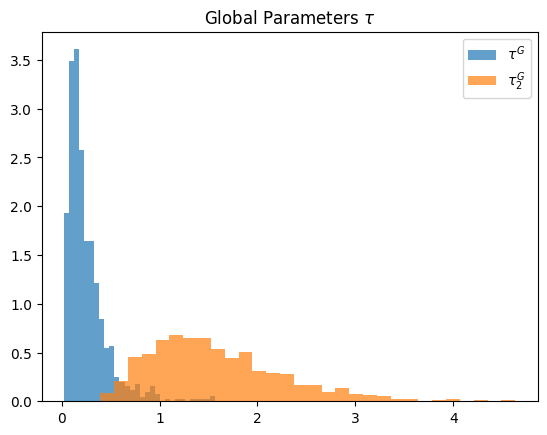

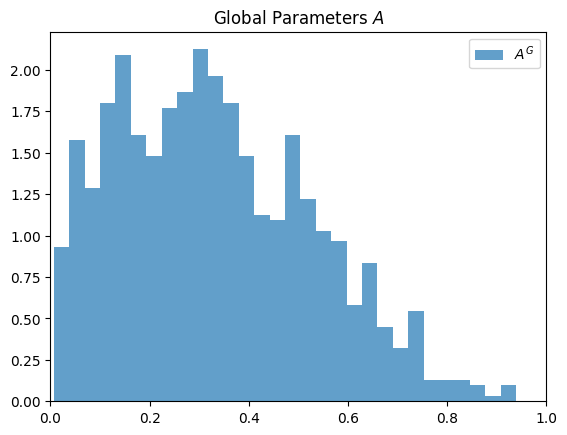

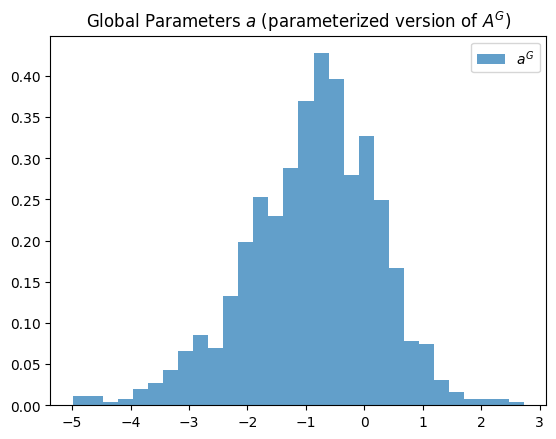

In [16]:
# distribution
n_gobal_samples = 1000
log_tau_G = np.random.normal(np.log(0.2), 0.7, n_gobal_samples)
log_sigma_tau_G = np.random.normal(-1, 0.1, n_gobal_samples)  # todo: how large do we expect the variance between pixels to be?

log_Delta_tau_G = np.random.normal(np.log(1.25), 0.5, n_gobal_samples)
log_Delta_sigma_tau_G = np.random.normal(-1, 0.1, n_gobal_samples)  # todo: how large do we expect the variance between pixels to be?

tau_G2 = np.exp(log_tau_G) + np.exp(log_Delta_tau_G)

A_G = np.random.beta(a=1.5, b=3, size=n_gobal_samples)  # todo: choose a suitable a
a_G = np.log(A_G / (1 - A_G))
log_sigma_A_G = np.random.normal(-3, 0.1, n_gobal_samples)  # todo: how large do we expect the variance between pixels to be?

plt.title(r'Global Parameters $\tau$')
plt.hist(np.exp(log_tau_G), bins=30, alpha=0.7, density=True, label=r'$\tau^G$')
plt.hist(tau_G2, bins=30, alpha=0.7, density=True, label=r'$\tau^G_2$')
plt.legend()
plt.show()

plt.title('Global Parameters $A$')
plt.hist(A_G, bins=30, alpha=0.7, density=True, label=r'$A^G$')
plt.xlim(0, 1)
plt.legend()
plt.show()

plt.title('Global Parameters $a$ (parameterized version of $A^G$)')
plt.hist(a_G, bins=30, alpha=0.7, density=True, label=r'$a^G$')
plt.legend()
plt.show()

In [8]:
# compute quantiles
np.quantile(np.exp(log_tau_G), [0.025, 0.975]), np.quantile(tau_G2, [0.025, 0.975])

(array([0.05572948, 0.76097467]), array([0.64380184, 3.38817196]))

## Local Parameters

$\tau^{L} \sim \mathcal{N}(\tau^{G}, \sigma^2_{\tau^{G}})$

$\Delta\tau^{L} \sim \mathcal{N}(\Delta\tau^{G}, \Delta\sigma^2_{\Delta\tau})$

$\tau^{L}_2 = \tau^{L} + \Delta\tau^{L}$

$A^L \sim \text{Beta}(a,b)$

index: 24


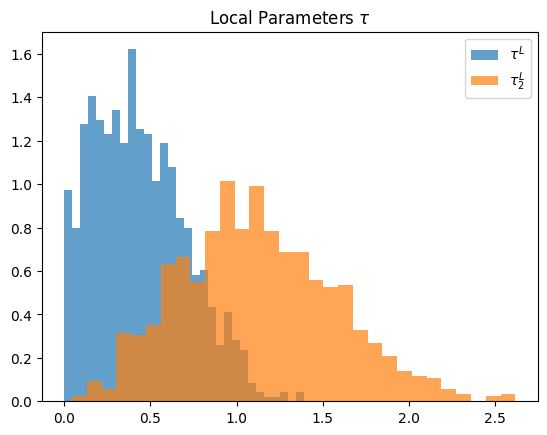

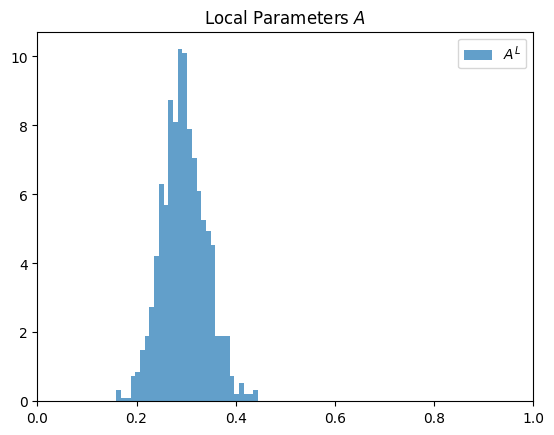

In [18]:
n_local_samples = 1000
global_index = np.random.choice(np.arange(n_gobal_samples), size=1)[0]
print('index:', global_index)

a_trunc, b_trunc = 0, np.inf
loc = np.exp(log_sigma_tau_G[global_index])
scale = np.exp(log_sigma_tau_G[global_index])
a, b = (a_trunc - loc) / scale, (b_trunc - loc) / scale
tau_L = truncnorm(a, b, loc=loc, scale=scale).rvs(size=n_local_samples)

a_trunc, b_trunc = 0, np.inf
loc = np.exp(log_Delta_tau_G[global_index])
scale = np.exp(log_Delta_sigma_tau_G[global_index])
a, b = (a_trunc - loc) / scale, (b_trunc - loc) / scale
Delta_tau_L = truncnorm(a, b, loc=loc, scale=scale).rvs(size=n_local_samples)

tau_L_2 = tau_L + Delta_tau_L

a_trunc, b_trunc = 0, 1
loc = A_G[global_index]
scale = np.exp(log_sigma_A_G[global_index])
a, b = (a_trunc - loc) / scale, (b_trunc - loc) / scale
A_L = truncnorm(a, b, loc=loc, scale=scale).rvs(size=n_local_samples)

plt.title(r'Local Parameters $\tau$')
plt.hist(tau_L, bins=30, alpha=0.7, density=True, label=r'$\tau^L$')
plt.hist(tau_L_2, bins=30, alpha=0.7, density=True, label=r'$\tau^L_2$')
plt.legend()
plt.show()

plt.title(r'Local Parameters $A$')
plt.hist(A_L, bins=30, alpha=0.7, density=True, label=r'$A^L$')
plt.xlim(0, 1)
plt.legend()
plt.show()

In [13]:
# compute quantiles
np.quantile(tau_L, [0.025, 0.975]), np.quantile(tau_L_2, [0.025, 0.975])

(array([0.02305161, 0.98690083]), array([0.53399047, 2.22760207]))